In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import altair as alt
import plotly.graph_objs as go

plt.rcParams['font.family'] = "serif"

# Load dataset into Pandas DataFrame

In [2]:
# Tenemos los siguientes ficheros
import os
print(os.listdir("C:/Users/Esperanza/Desktop/UOC/TFM/jigsaw-unintended-bias-in-toxicity-classification/"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
#Los cargamos en un dataframe
path_train="C:/Users/Esperanza/Desktop/UOC/TFM/jigsaw-unintended-bias-in-toxicity-classification/train.csv"
path_test="C:/Users/Esperanza/Desktop/UOC/TFM/jigsaw-unintended-bias-in-toxicity-classification/test.csv"
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
# Veamos los dos primeros del dataframe de train
df_train.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


In [4]:
print('Dimensiones del dataset de entrenamiento %d ' % len(df_train))
print('Dimensión deldataset de test %d' % len(df_test))
print('Columnas del archivo de entrenamiento: %s' % df_train.columns)

Dimensiones del dataset de entrenamiento 1804874 
Dimensión deldataset de test 97320
Columnas del archivo de entrenamiento: Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')


In [5]:
# Contamos cuantos valores nulos hay 
df_train_res = df_train.isnull().sum()/len(df_train)
df_train_res[df_train_res>0]
#df_test.isna().sum(),df_train.isna().sum()

asian                                  0.775536
atheist                                0.775536
bisexual                               0.775536
black                                  0.775536
buddhist                               0.775536
christian                              0.775536
female                                 0.775536
heterosexual                           0.775536
hindu                                  0.775536
homosexual_gay_or_lesbian              0.775536
intellectual_or_learning_disability    0.775536
jewish                                 0.775536
latino                                 0.775536
male                                   0.775536
muslim                                 0.775536
other_disability                       0.775536
other_gender                           0.775536
other_race_or_ethnicity                0.775536
other_religion                         0.775536
other_sexual_orientation               0.775536
physical_disability                    0

In [6]:
# Valores nulos en porcentaje con cada uno de los dataset
res=df_train_res[df_train_res>0]*100 
res

asian                                  77.553558
atheist                                77.553558
bisexual                               77.553558
black                                  77.553558
buddhist                               77.553558
christian                              77.553558
female                                 77.553558
heterosexual                           77.553558
hindu                                  77.553558
homosexual_gay_or_lesbian              77.553558
intellectual_or_learning_disability    77.553558
jewish                                 77.553558
latino                                 77.553558
male                                   77.553558
muslim                                 77.553558
other_disability                       77.553558
other_gender                           77.553558
other_race_or_ethnicity                77.553558
other_religion                         77.553558
other_sexual_orientation               77.553558
physical_disability 

In [7]:
str(res.count())

'25'

# Análisis de la columna target del dataset.

La columna target es la que el modelo debe predecir. Este campo representa la fracción de peronas que creyeron que ese comentario era tóxico. 

In [8]:
df_train['result'] = df_train['target'].apply(lambda x: 1 if x >= 0.5 else 0)

print('Cuantos comentarios han sido comentados como negativos %d ' % len(df_train[df_train['result'] == 0]))
print('Cuantos comentarios han sido comentados como positivos %d ' % len(df_train[df_train['result'] == 1]))

Cuantos comentarios han sido comentados como negativos 1660540 
Cuantos comentarios han sido comentados como positivos 144334 


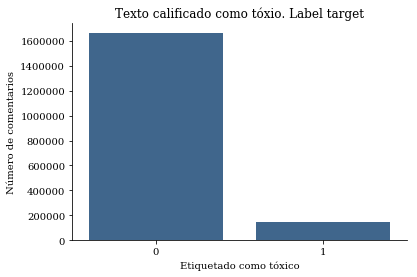

In [9]:
dy = sns.countplot(data=df_train, x = 'result', color=(0.2, 0.4, 0.6))
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Texto calificado como tóxio. Label target')
plt.xlabel('Etiquetado como tóxico')
plt.ylabel('Número de comentarios')
plt.show()

Cuales son los valores que más se han repetido

In [10]:
df_train['target'].value_counts().head(5)

0.000000    1264764
0.166667     138501
0.200000     107492
0.300000      59098
0.400000      50013
Name: target, dtype: int64

Calculamos el tamaño del dataset

In [11]:
print("tamaño del dataset de entrenamiento:    "+ str(df_train.shape))
print("tamaño del dataset de evaluación:       "+ str(df_test.shape))

tamaño del dataset de entrenamiento:    (1804874, 46)
tamaño del dataset de evaluación:       (97320, 2)


# Comentarios duplicados 

In [12]:
numero_total_elem=len(df_train['comment_text']) 
numero_unico_elem=df_train['comment_text'].nunique()
print( "Porcentaje de comentarios únicos " + str(numero_unico_elem/numero_total_elem))
print("Número de elementos repetidos  "+ str(numero_total_elem-numero_unico_elem))

Porcentaje de comentarios únicos 0.9866744160534198
Número de elementos repetidos  24051


# Contar el número de palabras 

In [13]:
df_train['word_count'] = [len(x.split(" ")) for x in df_train.comment_text]
df_train[['comment_text','word_count']].head()

,comment_text,word_count
0,"This is so cool. It's like, 'would you want yo...",19
1,Thank you!! This would make my life a lot less...,22
2,This is such an urgent design problem; kudos t...,16
3,Is this something I'll be able to install on m...,17
4,haha you guys are a bunch of losers.,8


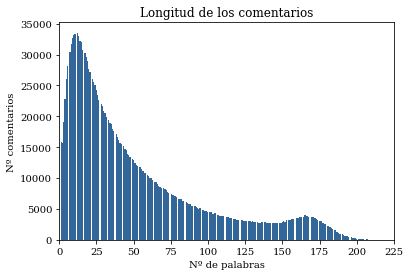

In [14]:
# Dibujamos la distribución 
plt.hist(df_train['word_count'],bins=1000 ,color=(0.2, 0.4, 0.6))
plt.title('Longitud de los comentarios')
plt.xlabel('Nº de palabras')
plt.ylabel('Nº comentarios')
plt.xlim(0, 225)
plt.show()

# ¿Está balanceado?

In [15]:
#Se define una lista con las identidades del dataset
columnas_identidad=['asian','atheist','bisexual','black','buddhist','christian',\
                    'female','heterosexual','hindu','homosexual_gay_or_lesbian',\
                    'intellectual_or_learning_disability','jewish','latino','male','muslim','other_disability',\
                    'other_gender','other_race_or_ethnicity','other_religion','other_sexual_orientation',\
                    'physical_disability','psychiatric_or_mental_illness','transgender','white']


In [16]:
#Cálculo de cuantas son en total para comprobar que no hay ninguna olvidada
len(columnas_identidad)

24

In [17]:
#Porcentaje a modo de ejemplos de los comentarios negativos dirigidos a la gente blanca 
df_train = df_train.fillna(0)
subgroup_counts = df_train.loc[(df_train['white'] != 0.0)]['target'].value_counts()
subgroup_counts[1]/subgroup_counts[0]
round(subgroup_counts[1]/subgroup_counts[0], 2)

0.01

In [18]:
subgroup_df = pd.DataFrame(columns = ['identity', 'toxic', 'non_toxic', 'toxic_ratio', 'percent_of_total'])               
t_counts = df_train['target'].value_counts()  
num_comments = df_train['comment_text'].size

In [19]:
#Calculamos la cantidad de veces que aparece cada una de las identidades
for idnt in columnas_identidad:
    subgroup = df_train.loc[(df_train[idnt] != 0.0)]
    subgroup_counts = df_train.loc[(df_train[idnt] != 0.0)]['target'].value_counts()      
    subgroup_dict = {'identity': idnt, 'toxic': subgroup_counts.iloc[1], 'non_toxic': subgroup_counts.iloc[0]}
    subgroup_df = subgroup_df.append(subgroup_dict, ignore_index=True)

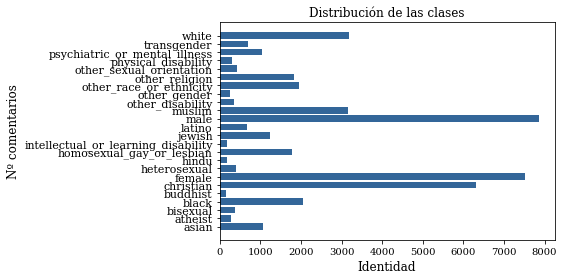

In [20]:
#Dibujamos los resultados
plt.barh(subgroup_df.identity, subgroup_df.toxic,color=(0.2, 0.4, 0.6))
plt.xlabel('Identidad', fontsize=12)
plt.ylabel('Nº comentarios', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)
plt.title('Distribución de las clases')
plt.show()

# Rango de fechas en el que se obtuvieron los comentarios

In [21]:
#Vamos a dividir las identidades en los cinco grupos generales 
raza_etnia=['asian','hindu','jewish','muslim','latino','black','white','other_race_or_ethnicity']
religion=['atheist','buddhist','christian', 'other_religion']
orientacion_sexual=['bisexual','heterosexual', 'homosexual_gay_or_lesbian','other_sexual_orientation']
discapacidad=['psychiatric_or_mental_illness','intellectual_or_learning_disability','physical_disability','other_disability']
genero=['female', 'male','transgender','other_gender']


In [22]:
#Tomamos el mismo dataset anterior pero esta vez con la columna fecha
df_fecha = df_train.loc[:, ['created_date', 'target'] + columnas_identidad].dropna()

In [23]:
# Para cada una de las identidades podemos calcular el peso relativo 
df_peso_rel = df_fecha.loc[:, columnas_identidad]  / df_fecha.loc[:, columnas_identidad] .sum()
df_peso_rel.head(2)

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Como índice vamos a indicar el valor relativo resultado de multiplicar el peso anterior con el valor total dado al comentario
df_valor_rel = df_peso_rel.multiply(df_fecha.loc[:,'target'], axis="index")
df_valor_rel.head(1)

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Conversión de la fecha a datetime y extracción de la fecha sin hora
df_valor_rel['created_date'] = pd.to_datetime(df_fecha['created_date'].apply(lambda dt: dt.split(' ')[0]))
#Agrupaión del total de comentarios por día 
df_valor_rel_por_dia = df_valor_rel.groupby(['created_date']).sum()
df_valor_rel_por_dia.head(4)

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white
created_date,,,,,,,,,,,,,,,,,,,,,
2015-09-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Para la representación debemos ordenarlo por fecha 
df_valor_rel_por_dia=df_valor_rel_por_dia.sort_index()
df_valor_rel_por_dia.head()

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white
created_date,,,,,,,,,,,,,,,,,,,,,
2015-09-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#Suma por cada día (por filas)
df_valor_rel_por_dia[raza_etnia].sum(axis=1).head(2)

created_date
2015-09-29    0.0
2015-10-06    0.0
dtype: float64

In [28]:
#Creamos por cada subgrupo de identidades una columna que represente la suma por cada día
df_valor_rel_por_dia['raza_etnia_suma']=df_valor_rel_por_dia[raza_etnia].sum(axis=1)
df_valor_rel_por_dia['religion_suma']=df_valor_rel_por_dia[religion].sum(axis=1)
df_valor_rel_por_dia['orientacion_sexual_suma']=df_valor_rel_por_dia[orientacion_sexual].sum(axis=1)
df_valor_rel_por_dia['discapacidad_suma']=df_valor_rel_por_dia[discapacidad].sum(axis=1)
df_valor_rel_por_dia['genero_suma']=df_valor_rel_por_dia[genero].sum(axis=1)

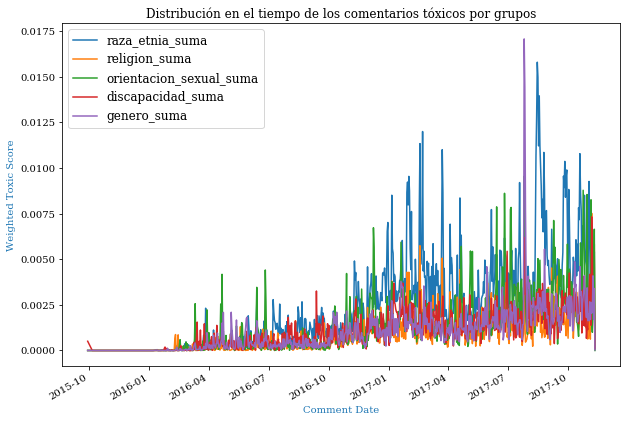

In [29]:
# and then plot a time-series line plot per identity group
df_valor_rel_por_dia[['raza_etnia_suma', 'religion_suma', 'orientacion_sexual_suma',\
                      'discapacidad_suma','genero_suma']].plot(figsize=(10,7), fontsize=10) 
plt.legend(prop={'size': 12})
plt.xlabel('Comment Date', fontsize=10, color='C0')
plt.ylabel('Weighted Toxic Score', fontsize=10, color='C0')
plt.title('Distribución en el tiempo de los comentarios tóxicos por grupos', fontsize=12)
plt.show()

# Coeficiente de correlación de Pearson

In [30]:
df_train.drop(['article_id','publication_id', 'parent_id'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)